In [2]:
import os
os.environ['KAGGLE_USERNAME']="waelrabah"
os.environ['KAGGLE_KEY']=""

In [3]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 99% 133M/134M [00:01<00:00, 63.2MB/s]
100% 134M/134M [00:01<00:00, 82.0MB/s]


In [4]:
!unzip multiclass-weather-dataset.zip

Archive:  multiclass-weather-dataset.zip
  inflating: dataset/alien_test/Cloud_1.png  
  inflating: dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/alien_test/foggy_1.jpg  
  inflating: dataset/alien_test/foggy_10.jpg  
  inflating: dataset/alien_test/foggy_2.jpg  
  inflating: dataset/alien_test/foggy_3.jpg  
  inflating: dataset/alien_test/foggy_4.jpg  
  inflating: dataset/alien_test/foggy_5.jpg  
  inflating: dataset/alien_test/foggy_6.jpg  
  inflating: dataset/alien_test/foggy_7.jpg  
  inflating: dataset/alien_test/foggy_8.jpg  
  inflating: dataset/alien_test/foggy_9.jpg  
  inflating: dataset/alien_test/rain_1.jpg  
  inflating: dataset/alien_test/rain_2.png  
  inflating: dataset/alien_test/rain_3.jpg  
  inflating: dataset/alien_test/rain_4.jpg  
  inflating: dataset/alien_test/rain_5.jpg  
  inflating: dataset/alien_test/rain_6.jpg  
  inflating: dataset/alien_test/shine_1.jpg

In [5]:
dataset_dir='/content/dataset'
base_dir='/content/weather-data'
os.mkdir(base_dir)

In [6]:
# create train and validation folders
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
val_dir=os.path.join(base_dir,'val')
os.mkdir(val_dir)

# folders under train dir

train_cloudy_dir=os.path.join(train_dir,'cloudy')
os.mkdir(train_cloudy_dir)
train_foggy_dir=os.path.join(train_dir,'foggy')
os.mkdir(train_foggy_dir)
train_rainy_dir=os.path.join(train_dir,'rainy')
os.mkdir(train_rainy_dir)
train_shine_dir=os.path.join(train_dir,'shine')
os.mkdir(train_shine_dir)
train_sunrise_dir=os.path.join(train_dir,'sunrise')
os.mkdir(train_sunrise_dir)

# folders under val dir

val_cloudy_dir=os.path.join(val_dir,'cloudy')
os.mkdir(val_cloudy_dir)
val_foggy_dir=os.path.join(val_dir,'foggy')
os.mkdir(val_foggy_dir)
val_rainy_dir=os.path.join(val_dir,'rainy')
os.mkdir(val_rainy_dir)
val_shine_dir=os.path.join(val_dir,'shine')
os.mkdir(val_shine_dir)
val_sunrise_dir=os.path.join(val_dir,'sunrise')
os.mkdir(val_sunrise_dir)

In [7]:
def split_data(source,training,validation,split_size):
  files=[]
  for filename in os.listdir(source):
    file=source+"/"+filename
    if os.path.getsize(file) > 0 :
      files.append(filename)
    else :
      print(fileame+" is of 0 length so ignoring it .")
  training_length=int(len(files)*split_size)
  val_length=len(files)-training_length
  shuffled_files=random.sample(files,len(files))
  training_set=shuffled_files[0:training_length]
  val_set=shuffled_files[0:val_length]
  for filename in training_set :
    this_file=source+"/"+filename
    destination=training+"/"+filename
    copyfile(this_file,destination)
  for filename in val_set :
    this_file=source+"/"+filename
    destination=validation+"/"+filename
    copyfile(this_file,destination)

In [8]:
cloudy_source='/content/dataset/cloudy'
training_cloudy_source='/content/weather-data/train/cloudy'
val_cloudy_source='/content/weather-data/val/cloudy'

foggy_source='/content/dataset/foggy'
training_foggy_source='/content/weather-data/train/foggy'
val_foggy_source='/content/weather-data/val/foggy'

rainy_source='/content/dataset/rainy'
training_rainy_source='/content/weather-data/train/rainy'
val_rainy_source='/content/weather-data/val/rainy'

shine_source='/content/dataset/shine'
training_shine_source='/content/weather-data/train/shine'
val_shine_source='/content/weather-data/val/shine'

sunrise_source='/content/dataset/sunrise'
training_sunrise_source='/content/weather-data/train/sunrise'
val_sunrise_source='/content/weather-data/val/sunrise'

In [9]:
import os
import random
from shutil import copyfile

split_size=.85
split_data(cloudy_source,training_cloudy_source,val_cloudy_source,split_size)
split_data(foggy_source,training_foggy_source,val_foggy_source,split_size)
split_data(shine_source,training_shine_source,val_shine_source,split_size)
split_data(rainy_source,training_rainy_source,val_rainy_source,split_size)
split_data(sunrise_source,training_sunrise_source,val_sunrise_source,split_size)

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf

In [11]:
img_width=256
img_height=256
batch_size=16

In [12]:
training_dir='/content/weather-data/train/'

train_data_gen=ImageDataGenerator(rescale=1/255.0,rotation_range=30,zoom_range=.4,horizontal_flip=True)
train_generator=train_data_gen.flow_from_directory(training_dir,batch_size=batch_size,class_mode='categorical',target_size=(img_height,img_width))

Found 1274 images belonging to 5 classes.


In [13]:
val_dir='/content/weather-data/val/'

val_data_gen=ImageDataGenerator(rescale=1/255.0)
val_generator=train_data_gen.flow_from_directory(val_dir,batch_size=batch_size,class_mode='categorical',target_size=(img_height,img_width))

Found 226 images belonging to 5 classes.


In [14]:
early_stopping_cb=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')
best_model_file='Weather_classification_CNN_aug_best_weights'
best_model=ModelCheckpoint(best_model_file,monitor='val_acc',verbose=1,save_best_only=True)

In [18]:
model=Sequential(layers=[
      Conv2D(16,(3,3),activation='relu',input_shape=(img_height,img_width,3)),
      MaxPooling2D() ,
      Conv2D(32,(3,3),activation='relu'),
      MaxPooling2D() ,
      Conv2D(64,(3,3),activation='relu'),
      Conv2D(64,(3,3),activation='relu'),
      MaxPooling2D() ,
      Conv2D(128,(3,3),activation='relu'),
      Conv2D(128,(3,3),activation='relu'),
      MaxPooling2D() ,
      Conv2D(256,(3,3),activation='relu'),
      Conv2D(256,(3,3),activation='relu'),
      Conv2D(256,(3,3),activation='relu'),
      MaxPooling2D() ,
      Flatten(),
      Dense(512,activation='relu'),
      Dense(512,activation='relu'),
      Dense(5,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 64)       

In [19]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
with tf.device('/device:GPU:0'):
  history=model.fit(train_generator,epochs=30,verbose=1,validation_data=val_generator,callbacks=[best_model])

Epoch 1/30
80/80 [==============================] - 27s 326ms/step - loss: 1.5596 - accuracy: 0.2444 - val_loss: 1.2222 - val_accuracy: 0.4071
Epoch 2/30
80/80 [==============================] - 26s 324ms/step - loss: 1.2666 - accuracy: 0.3967 - val_loss: 1.1212 - val_accuracy: 0.4071
Epoch 3/30
80/80 [==============================] - 26s 323ms/step - loss: 1.1453 - accuracy: 0.4866 - val_loss: 0.9705 - val_accuracy: 0.5398
Epoch 4/30
80/80 [==============================] - 26s 325ms/step - loss: 1.0732 - accuracy: 0.5202 - val_loss: 0.9399 - val_accuracy: 0.5575
Epoch 5/30
80/80 [==============================] - 26s 326ms/step - loss: 0.9955 - accuracy: 0.5270 - val_loss: 0.9161 - val_accuracy: 0.5752
Epoch 6/30
80/80 [==============================] - 26s 325ms/step - loss: 0.9668 - accuracy: 0.5492 - val_loss: 0.9071 - val_accuracy: 0.5708
Epoch 7/30
80/80 [==============================] - 26s 323ms/step - loss: 0.9219 - accuracy: 0.5887 - val_loss: 0.9143 - val_accuracy: 0.5708

In [25]:
import matplotlib.pyplot as plt

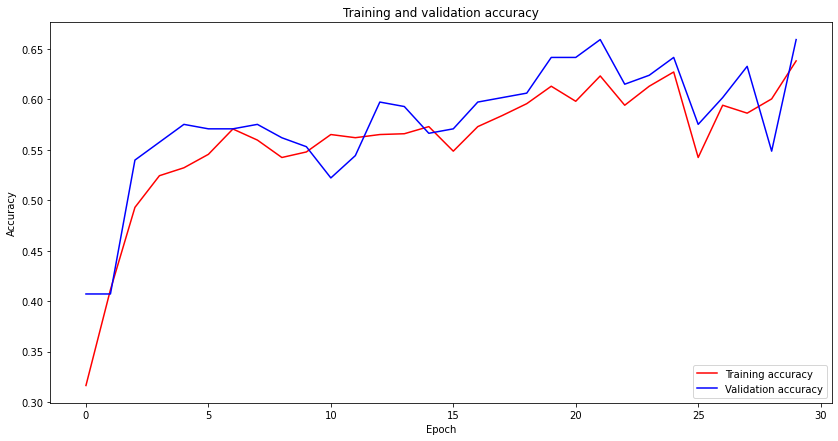

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig=plt.figure(figsize=(14,7))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array


def preprocess_image(path):
  img=load_img(path,target_size=(img_height,img_width))
  a=img_to_array(img)
  a=np.expand_dims(a,axis=0)
  a/=255.
  return a

In [28]:
# testing


test_images_dir='/content/dataset/alien_test/'
test_df=pd.read_csv('/content/dataset/test.csv')


test_dfTolist=test_df['Image_id'].tolist()
test_ids=[str(item) for item in test_dfTolist]


test_images=[test_images_dir+item for item in test_ids]
test_preprocessed=np.vstack([preprocess_image(fs) for fs in test_images])

np.save('/content/test_preproc.CNN.npy',test_preprocessed)

In [32]:
predictions=model.predict(test_preprocessed,batch_size=1,verbose=1)
answer=np.argmax(predictions,axis=1)
answer

30/30 [==============================] - 0s 2ms/step


array([1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 4, 3, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4])

In [35]:
test_df=pd.read_csv('/content/dataset/test.csv')
y_true=test_df['labels']
y_pred=predictions
y_true

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64

In [37]:
from sklearn.metrics import log_loss

logs=log_loss(y_true,y_pred,eps=1e-15,normalize=True,sample_weight=None,labels=None)

In [38]:
logs

0.8184477635814498

In [40]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_true,answer)
conf_mat

array([[0, 2, 0, 2, 0],
       [0, 6, 2, 1, 1],
       [0, 1, 5, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])